<a href="https://colab.research.google.com/github/kwanization/Machine_Learning_Study/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [98]:
def plot_data(dataset, position, title):
  X, y = dataset
  plt.subplot(position)
  plt.title(title)
  plt.scatter(X[:, 0], X[:, 1])

In [99]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [100]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

#와인 데이터 군집화

In [102]:
from sklearn.datasets import load_wine

In [103]:
wine = load_wine()

In [104]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [105]:
idx = np.where(predict == 0)
wine.target[idx]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [106]:
idx = np.where(predict == 1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [107]:
idx = np.where(predict == 2)
wine.target[idx]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#DBSCAN

In [29]:
#def plot_data(dataset, position, title):
  X, y = dataset
  plt.subplot(position)
  plt.title(title)
  plt.scatter(X[:, 0], X[:, 1])

In [30]:
#np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [32]:
#circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

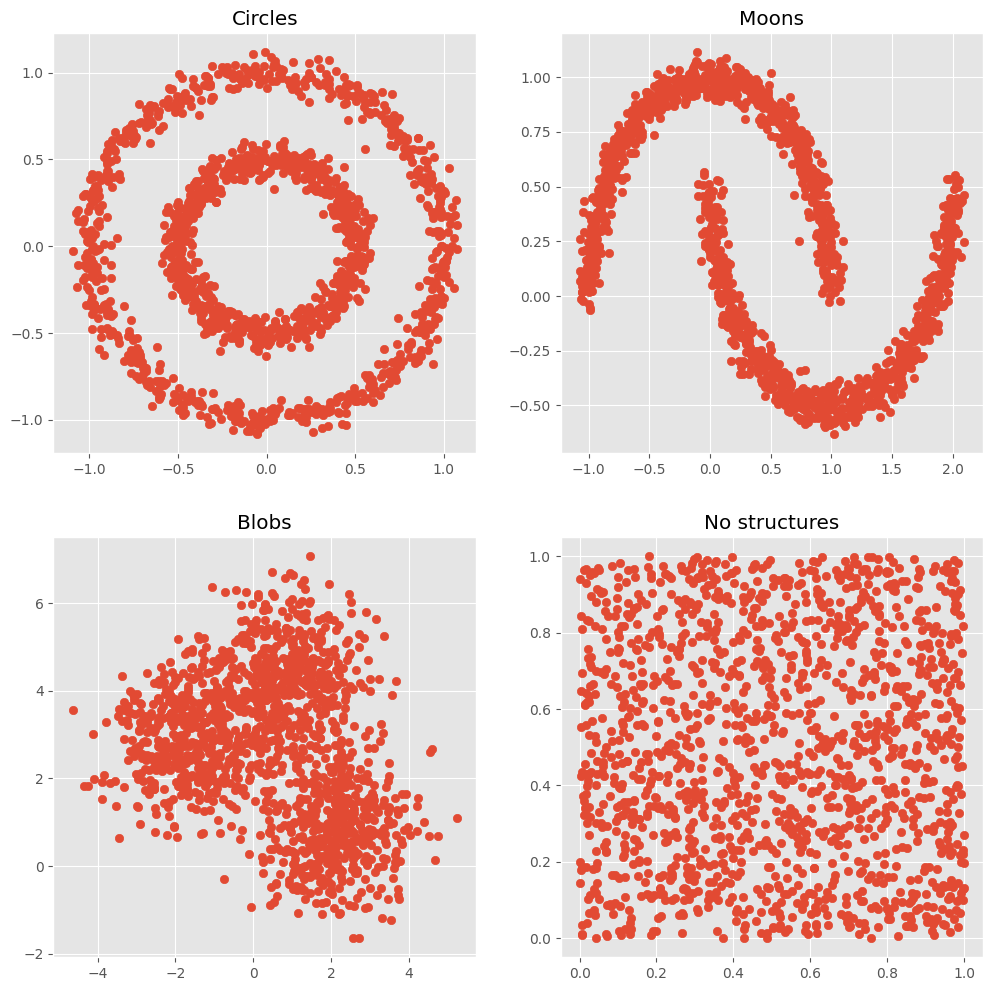

In [108]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No structures')

In [39]:
def fit_predict_plot(model, dataset, position, title):
  X, y = dataset

  model.fit(X)

  if hasattr(model, 'labels_'):
    labels = model.labels_.astype(int)
  else:
    labels = model.predict(X)

  colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D9E', '#D81159', '#FF6F61'])
  ax = plt.subplot(position)
  ax.set_title(title)
  ax.scatter(X[:, 0], X[:, 1], c=colors[labels])

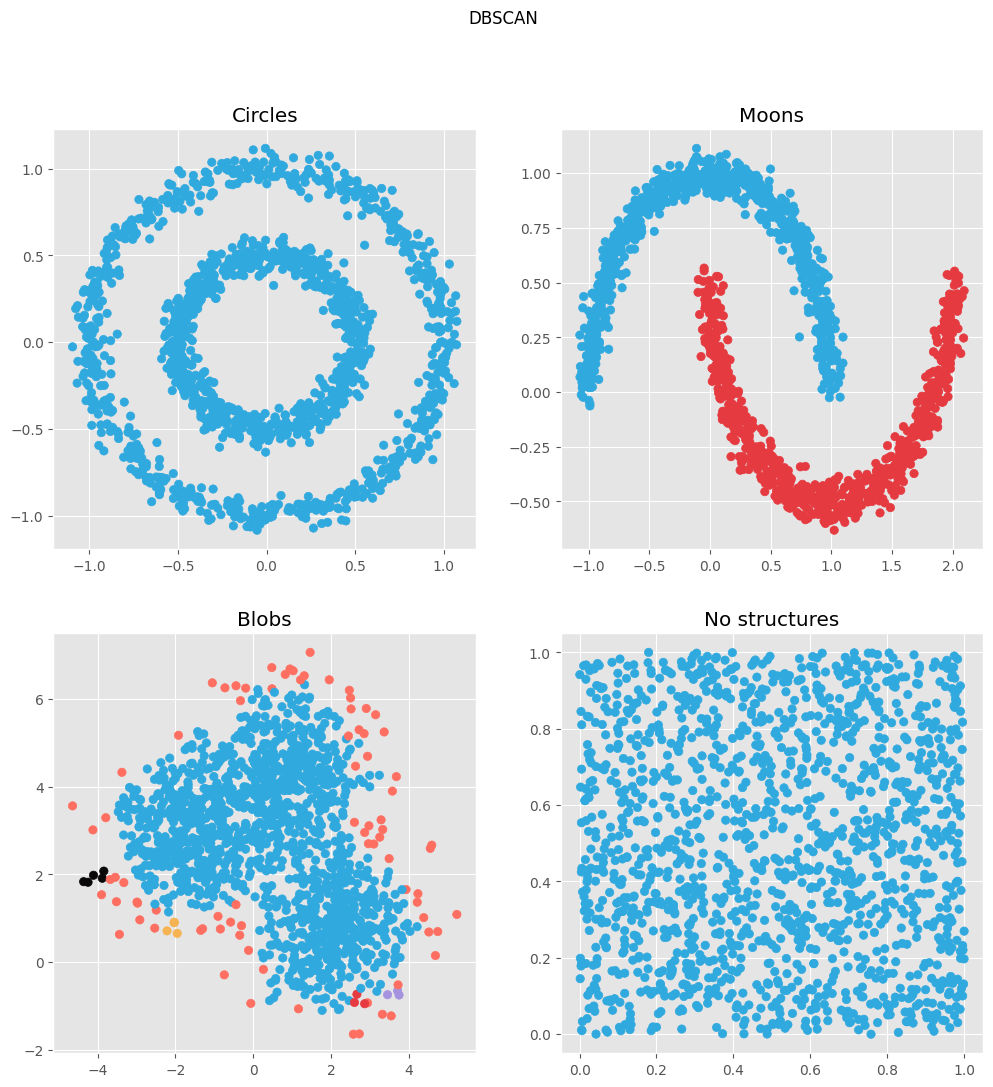

In [109]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=.3), no_structures, 224, 'No structures')

#OPTICS

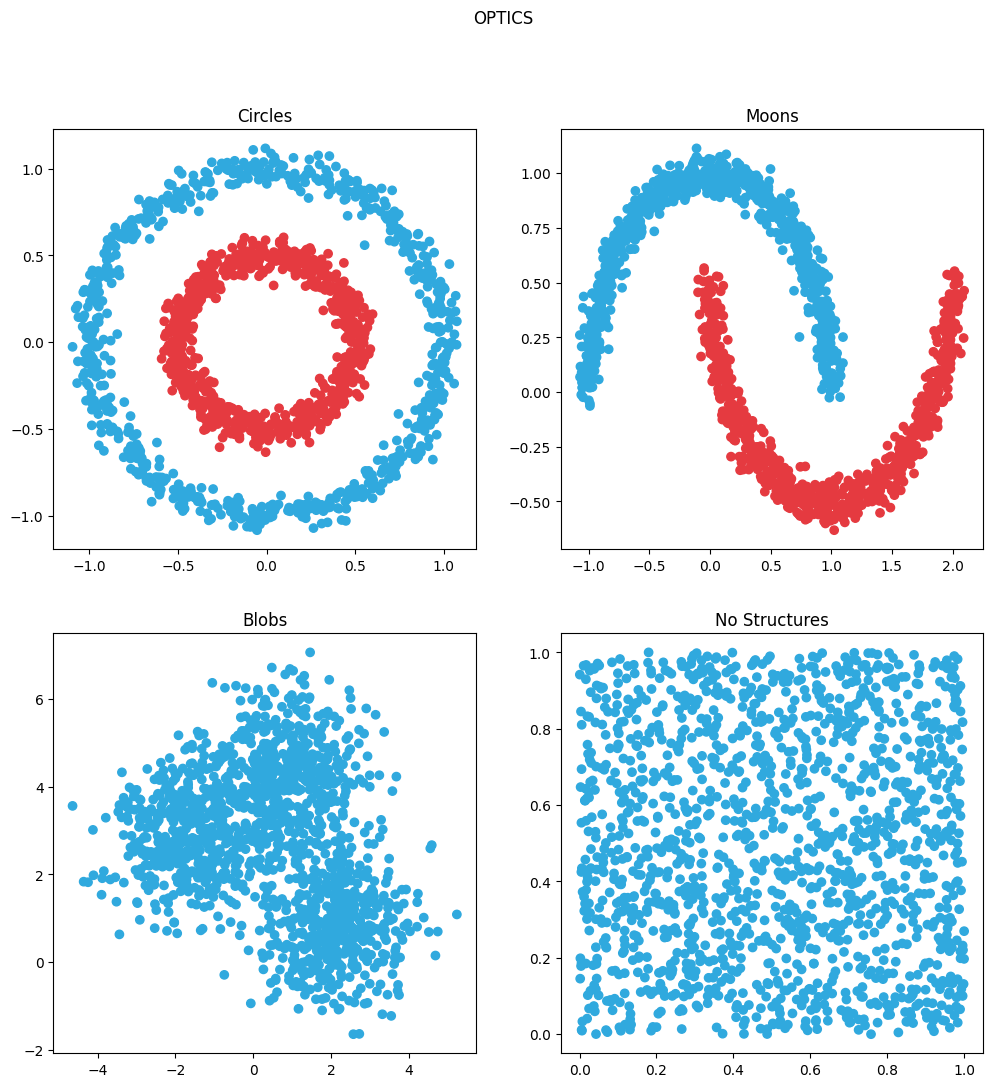

In [62]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), no_structures, 224, 'No Structures')

#Birch

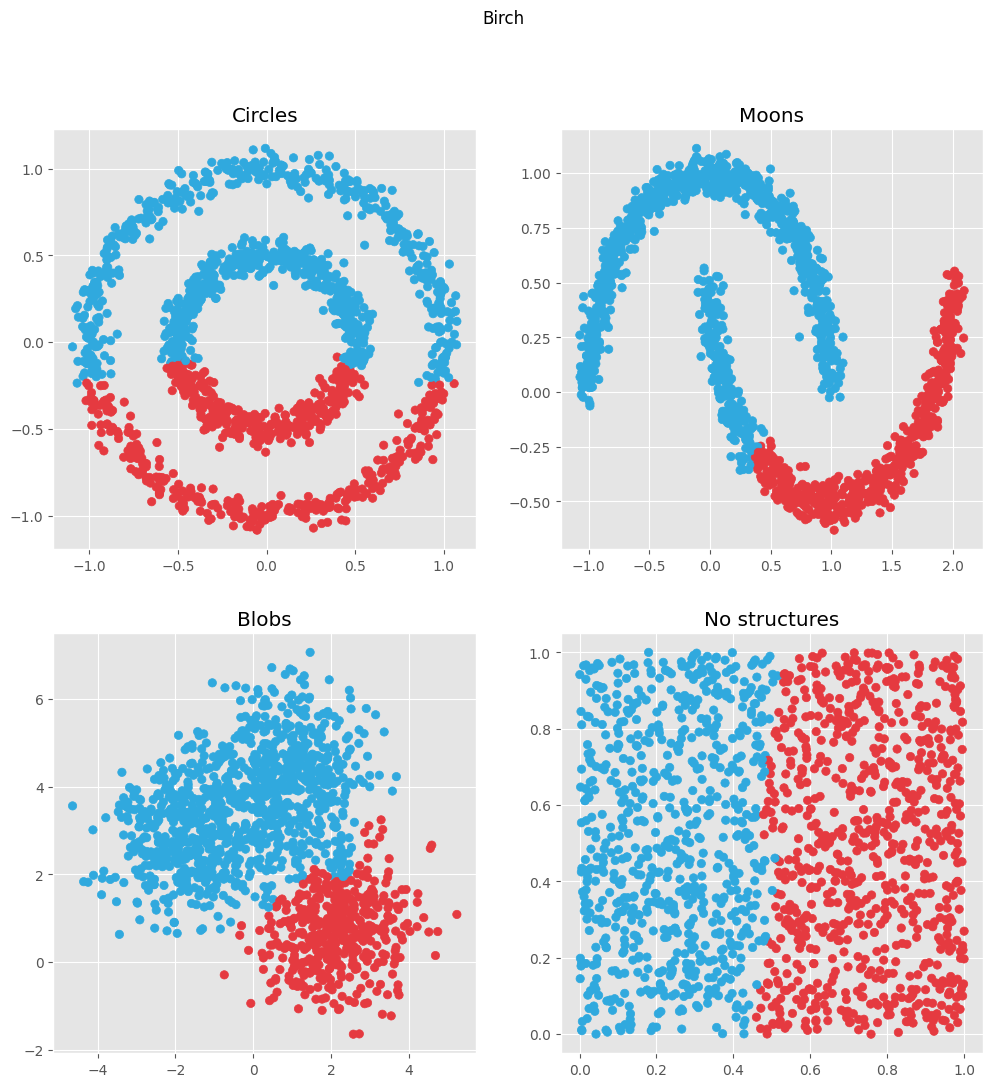

In [110]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), no_structures, 224, 'No structures')

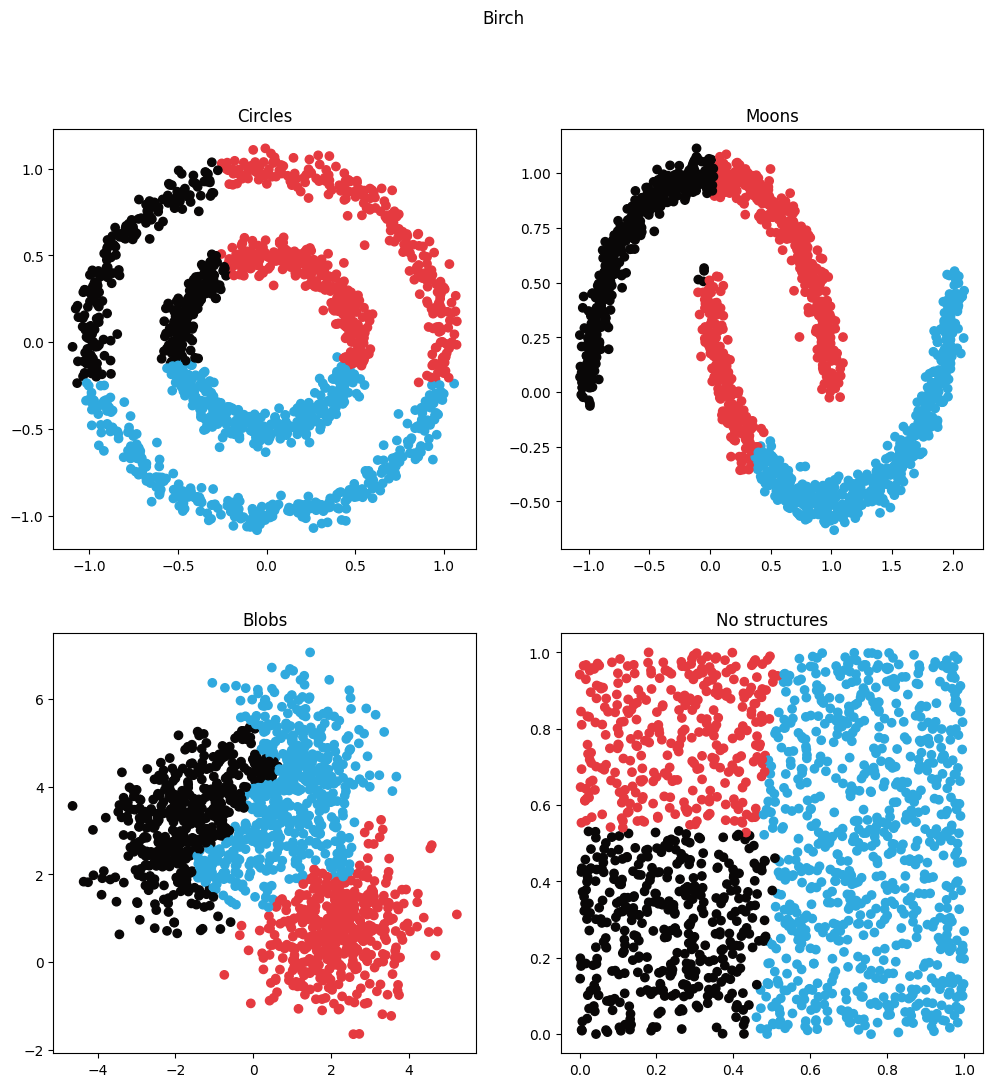

In [66]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), no_structures, 224, 'No structures')

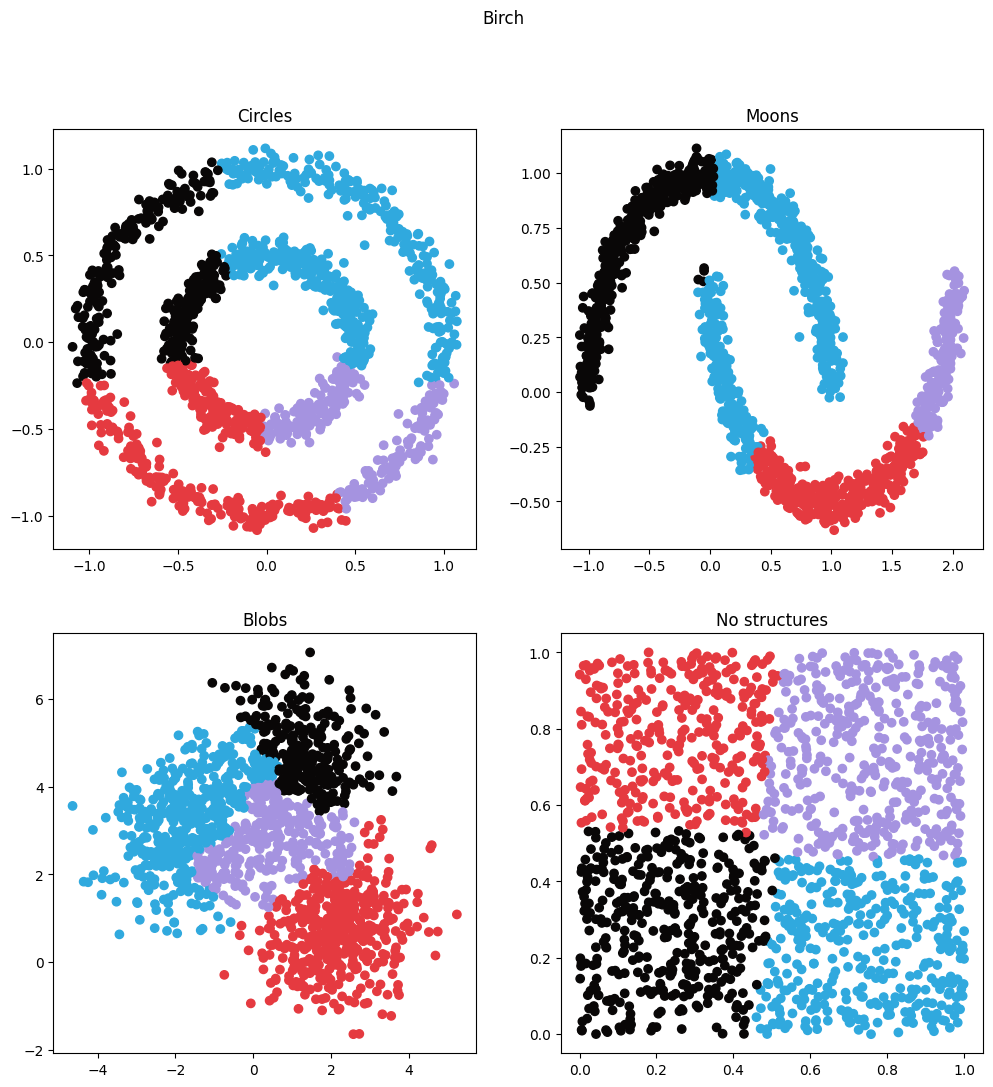

In [65]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), no_structures, 224, 'No structures')

#손글씨 데이터 군집화

In [75]:
from sklearn.datasets import load_digits

In [76]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [77]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [78]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [79]:
X = digits.data.reshape(-1, 8, 8)
y = digits.target

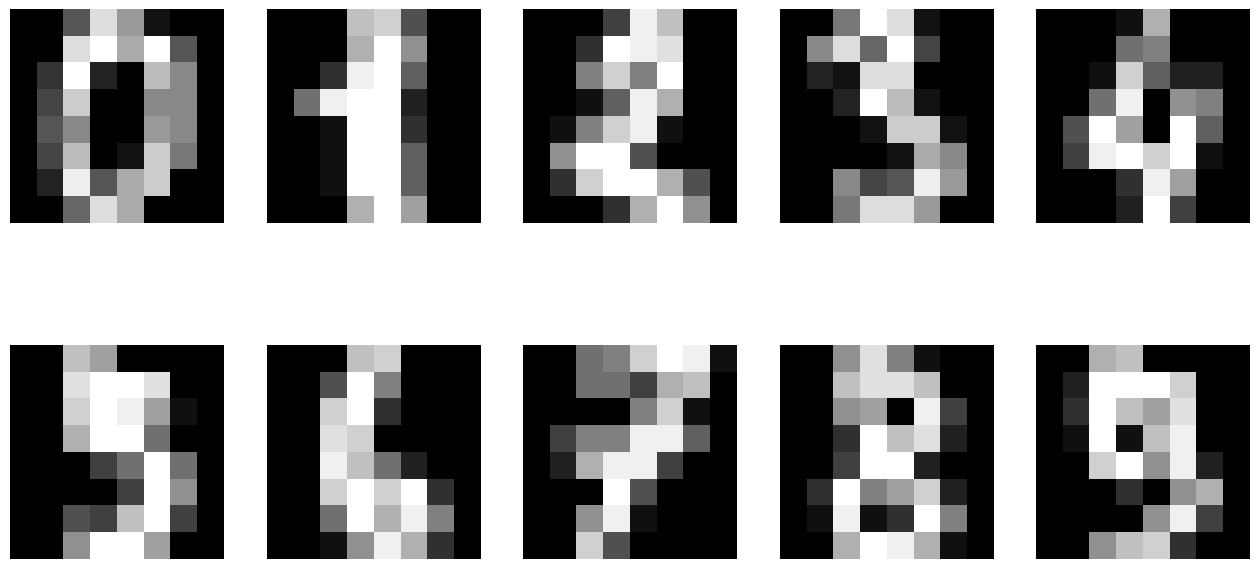

In [82]:
plt.style.use('ggplot')

plt.figure(figsize=(16, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X[i], cmap='gray')
  plt.axis('off')
plt.show()

#K-Means

In [83]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [84]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [1 1 4 7 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 9 9 1 1 1 1 1 1
 1 1 4 1 1 1 1 4 8 9 9 4 9 9 9 9 7 9 9 9 9 9 9 9 8 8 8 8 4 1 1 1 1 1 1 1 1
 1 1 1 8 1 1 1 1 1 1 1 1 8 6 9 9 9 9 9 4]
Cluster 2: [5 5 5 5 8 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 8 8 3 8 5 8 5 1 5 5 5 5
 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 4 9 9]
Cluster 3: [1 2 8 8 8 8 2 2 8 2 9 8 1 6 8 1 8 2 2 8 8 8 8 8 8 8 8 8 8 4 8 8 4 8 8 8 8
 8 1 1 8 1 8 8 8 1 1 1 1 1 1 1 8 1 1 8 8 8 6 2 8 8 8 8 8 9 8 8 8 8 1 8 8 8
 8 1 1 8 1 8 8 1 1 8 2 1 1 2 1 1 1 1 8 1 1 8 8 8 8 1 1 1 8 1 1 1 8 1 1 1 1
 1 1 8 8 1 1 8 1 8 1 1 8 1 1 1 1 1 1 8 1 1 8 8 8 8 1 8 1 1 1 1 1 1 1 1 8 1
 8 8 8 8 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 8 8 1 7 8 1 1 8 8 1 3 1
 7 8 1 3 3 4 1 8 1 1 4 1 1 8 1 1 8 1 1 3 8 1 3 8 8 8 1 1 8 1 3 3 3 1 8 1 1
 1 1 8 1 1 8 8 8 8]
Cluster 4: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 1 2 1 2 1 2 1 

Cluster: 1


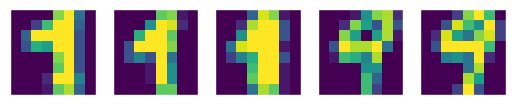

Cluster: 2


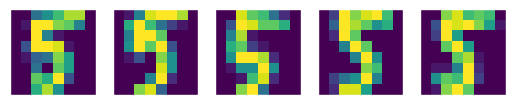

Cluster: 3


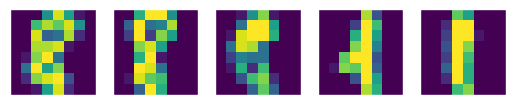

Cluster: 4


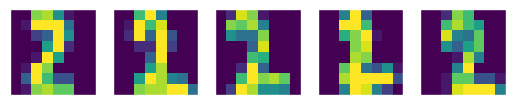

Cluster: 5


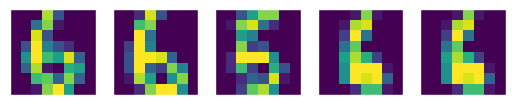

Cluster: 6


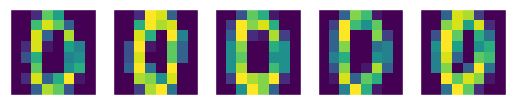

Cluster: 7


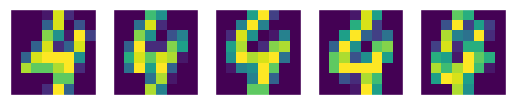

Cluster: 8


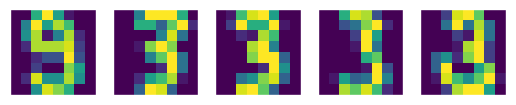

Cluster: 9


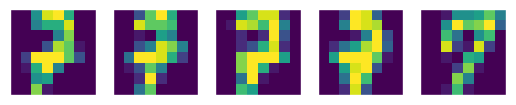

Cluster: 10


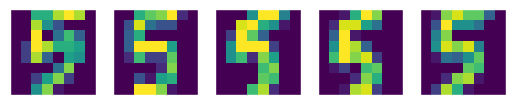

In [85]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]
  k = 1
  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

#Spectral Clustering

In [88]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

In [89]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Cluster 2: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 8 3 3 9 3 9 3
 9 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 8 3 3 9 8 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 5 9 9 9 9 3 5 3 3 3 3 9 9 3 3 3 9
 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9
 9 9 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3
 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3
 3 3 3 3 9 9 3 9 3

Cluster: 1


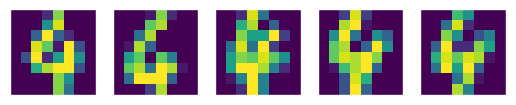

Cluster: 2


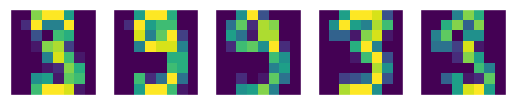

Cluster: 3


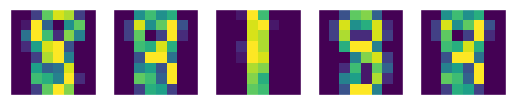

Cluster: 4


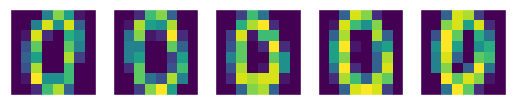

Cluster: 5


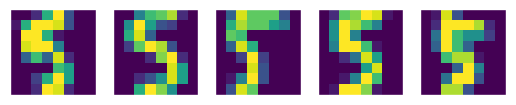

Cluster: 6


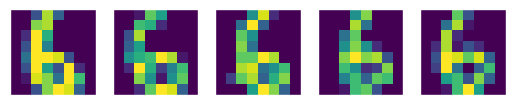

Cluster: 7


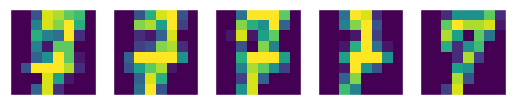

Cluster: 8


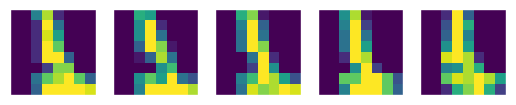

Cluster: 9


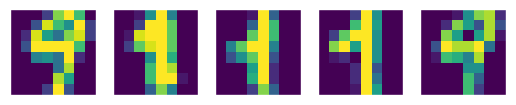

Cluster: 10


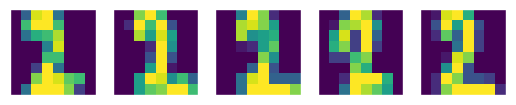

In [90]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]
  k = 1
  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

#Hierarchial Clustering

> 인용구 추가



In [91]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [92]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3

Cluster: 1


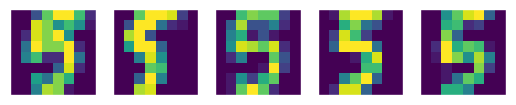

Cluster: 2


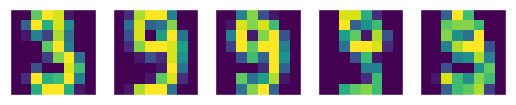

Cluster: 3


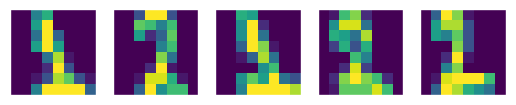

Cluster: 4


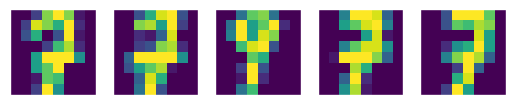

Cluster: 5


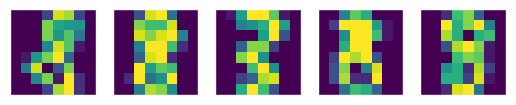

Cluster: 6


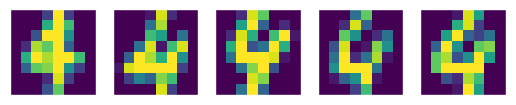

Cluster: 7


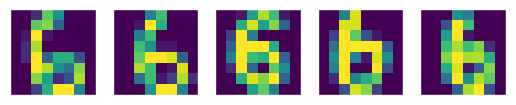

Cluster: 8


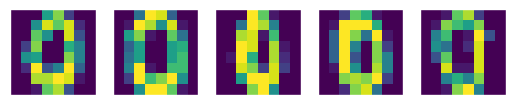

Cluster: 9


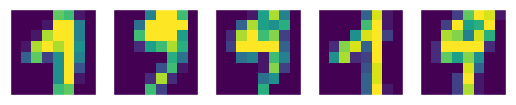

Cluster: 10


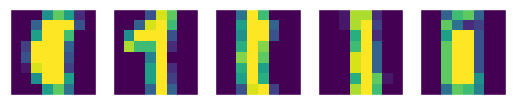

In [93]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]
  k = 1
  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

#Birch

In [94]:
birch = cluster.Birch(n_clusters=10, threshold=.3)
birch.fit(digits.data)
predict = birch.labels_

In [95]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3

Cluster: 1


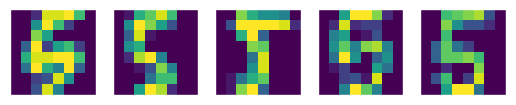

Cluster: 2


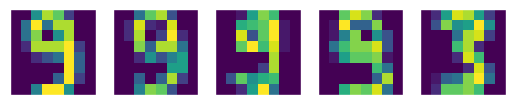

Cluster: 3


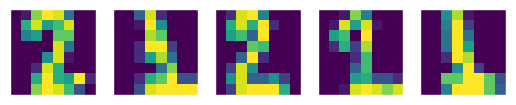

Cluster: 4


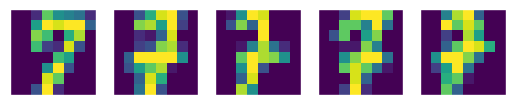

Cluster: 5


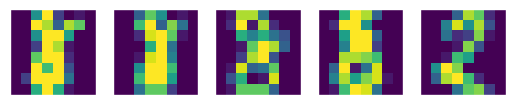

Cluster: 6


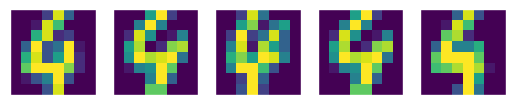

Cluster: 7


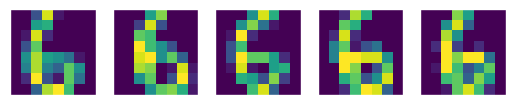

Cluster: 8


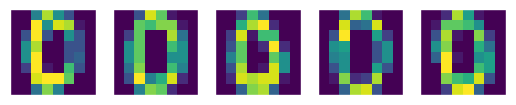

Cluster: 9


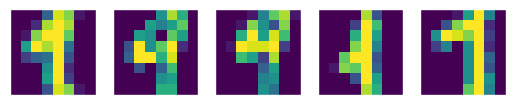

Cluster: 10


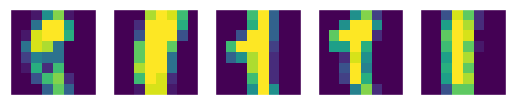

In [96]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()